In [1]:
#https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data
import pandas as pd
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
country = df["country"]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

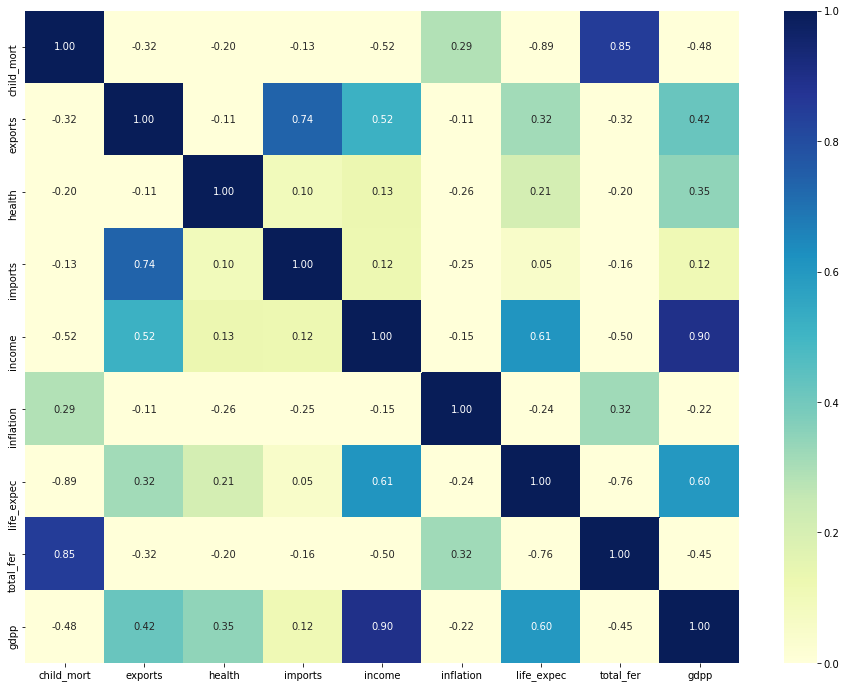

In [4]:
#you can change the cmap to cmap='RdYlGn' it will just make a color difference that's all
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [5]:
print(df.shape)

(167, 10)


In [6]:
col = ['country','gdpp']
df = df.drop(col,axis = 1)

In [7]:
df.shape

(167, 8)

In [8]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df) 
    kmeanModel.fit(df)     
      
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

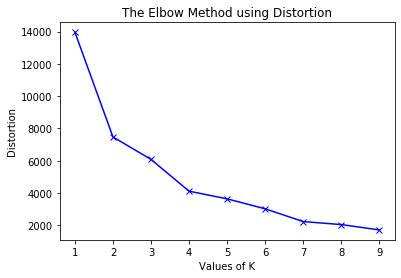

In [9]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [13]:
#clf = KMeans(n_clusters=3,init="random",n_init=10)
clf = KMeans(n_clusters=4, n_init=100).fit(df)

In [14]:
clf.labels_

array([1, 1, 3, 1, 3, 3, 1, 0, 0, 3, 3, 0, 1, 3, 3, 0, 1, 1, 1, 1, 1, 3,
       3, 2, 3, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 0, 3,
       0, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 0, 1, 1, 3, 3, 0, 3, 0, 1, 0, 1, 3, 1, 1, 2, 1, 1, 3, 3, 1,
       1, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 1, 3, 3, 2, 3, 3, 1, 1, 0, 1, 3, 3,
       1, 2, 3, 3, 1, 1, 3, 0, 1, 1, 1, 3, 0, 0, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 0, 0, 0, 3, 1, 1, 3, 1, 1, 1])

In [15]:
k = 0
for i in clf.labels_:
    if(i == 0):
        print (country[k] + " good")
    if(i == 1):
        print(country[k] + " bad")
    if(i == 2):
        print(country[k] +  " evolved")
    if(i == 3):
        print(country[k] +  " ok")
    k = k + 1

Afghanistan bad
Albania bad
Algeria ok
Angola bad
Antigua and Barbuda ok
Argentina ok
Armenia bad
Australia good
Austria good
Azerbaijan ok
Bahamas ok
Bahrain good
Bangladesh bad
Barbados ok
Belarus ok
Belgium good
Belize bad
Benin bad
Bhutan bad
Bolivia bad
Bosnia and Herzegovina bad
Botswana ok
Brazil ok
Brunei evolved
Bulgaria ok
Burkina Faso bad
Burundi bad
Cambodia bad
Cameroon bad
Canada good
Cape Verde bad
Central African Republic bad
Chad bad
Chile ok
China bad
Colombia bad
Comoros bad
Congo, Dem. Rep. bad
Congo, Rep. bad
Costa Rica ok
Cote d'Ivoire bad
Croatia ok
Cyprus good
Czech Republic ok
Denmark good
Dominican Republic bad
Ecuador bad
Egypt bad
El Salvador bad
Equatorial Guinea good
Eritrea bad
Estonia ok
Fiji bad
Finland good
France good
Gabon ok
Gambia bad
Georgia bad
Germany good
Ghana bad
Greece ok
Grenada bad
Guatemala bad
Guinea bad
Guinea-Bissau bad
Guyana bad
Haiti bad
Hungary ok
Iceland good
India bad
Indonesia bad
Iran ok
Iraq ok
Ireland good
Israel ok
Italy goo